In [91]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [92]:
loaddata = np.load('D:/20190923_tube_o/R_s_c_pvp1_1.npz')

In [93]:
list(loaddata.keys())


['leftidxall', 'rightidxall', 'ActArea']

In [94]:
ActArea = loaddata['ActArea']
leftidxall = loaddata['leftidxall']
rightidxall = loaddata['rightidxall']

In [95]:
JamL = rightidxall-leftidxall

In [96]:
timeline = np.array(list(range(len(JamL))))/25

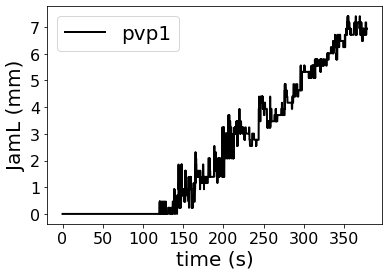

In [97]:

plt.plot(timeline,JamL*25/108,'-k',linewidth=2.0,label="pvp1")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('time (s)', fontsize=20)
plt.ylabel('JamL (mm)', fontsize=20)
plt.legend(fontsize=20)
plt.show()
plt.show()

In [8]:
ActAreaTrans = np.array(ActArea).T

In [9]:
ActAreaTrans.shape

(61, 9457)

In [10]:
avifile = 'D:/20190923_tube_o/R_s_c_pvp1_1.avi'
capture = cv2.VideoCapture(avifile)
backSub = cv2.createBackgroundSubtractorMOG2()

if not capture.isOpened:
    print('Unable to open: ' + file)
    exit(0)
print('width=' ,capture.get(cv2.CAP_PROP_FRAME_WIDTH))
print('height=',capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
totalN = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
print('length=',totalN)

width= 1548.0
height= 258.0
length= 9457


In [11]:
dump_idx = np.array(list(range(0,1548,200)))/25
dump_idx.astype("int")

array([ 0,  8, 16, 24, 32, 40, 48, 56])

In [12]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [13]:
for idx in dump_idx:
    print('idx')
    print(idx*25/108)
    print((idx+1)*25/108)


idx
0.0
0.23148148148148148
idx
1.8518518518518519
2.0833333333333335
idx
3.7037037037037037
3.935185185185185
idx
5.555555555555555
5.787037037037037
idx
7.407407407407407
7.638888888888889
idx
9.25925925925926
9.49074074074074
idx
11.11111111111111
11.342592592592593
idx
12.962962962962964
13.194444444444445


In [14]:
1548/108

14.333333333333334

12


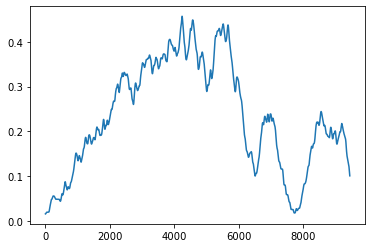

212


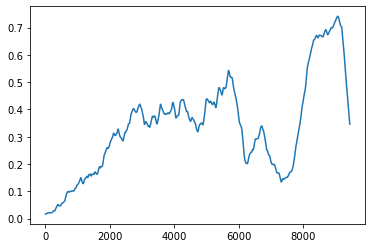

412


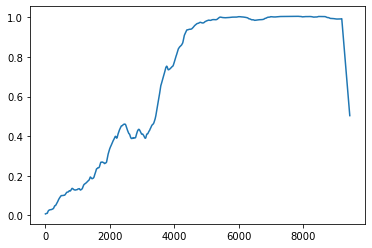

612


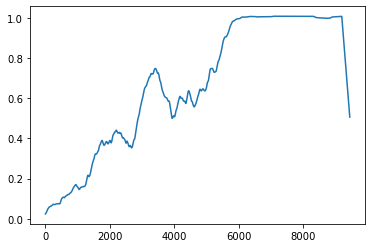

812


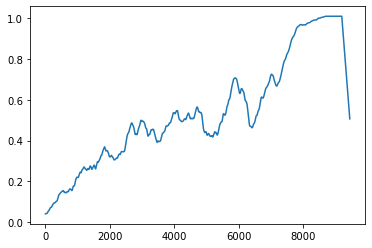

1012


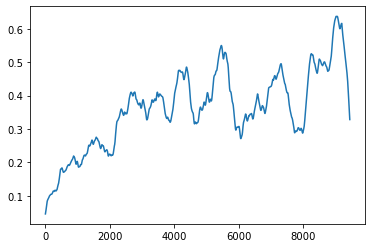

1212


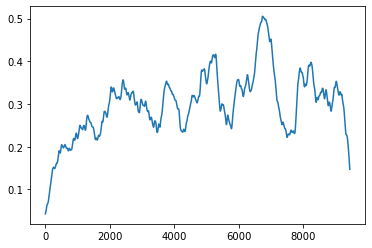

1412


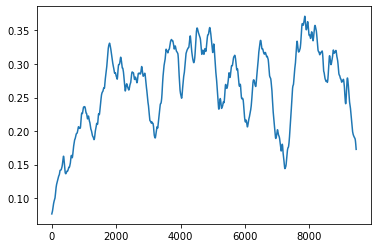

In [15]:
for idx in dump_idx.astype("int"):
    print(idx*25+12)
    plt.plot(smooth(ActAreaTrans[idx],500))
    plt.show()

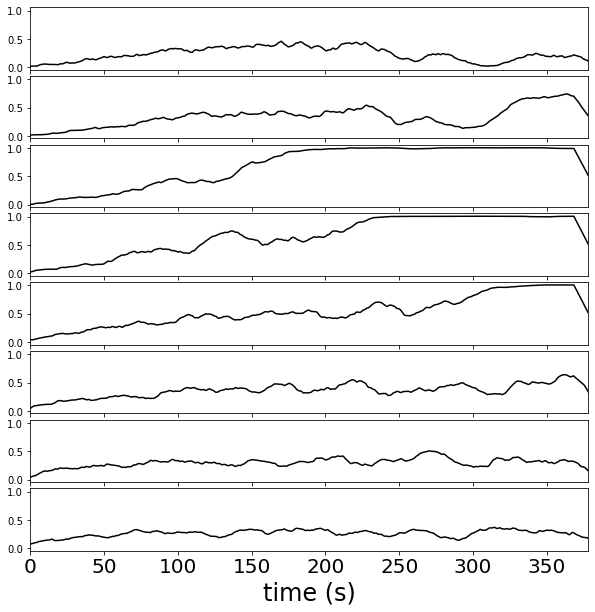

In [17]:
timeline = np.array(list(range(totalN)))/25
plt.rcParams['figure.figsize'] = [10, 10]
fig, axs = plt.subplots(8, sharex=True, sharey=True, gridspec_kw={'hspace': 0.1})
for loopcount, idx in enumerate(dump_idx.astype("int")):
    axs[loopcount].plot(timeline,smooth(ActAreaTrans[idx],500),'k')
    axs[loopcount].set_xlim(0, 378)

plt.xticks(fontsize=20)
plt.xlabel('time (s)', fontsize=24)
# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()


In [121]:
timeline

array([0.0000e+00, 4.0000e-02, 8.0000e-02, ..., 3.7816e+02, 3.7820e+02,
       3.7824e+02])

In [122]:
totalN*40/1000


378.28